# Линейные модели

- [Линейная регрессия](https://youtu.be/PaFPbb66DxQ)
    - [Ridge Regression](https://youtu.be/Q81RR3yKn30)
    - [Lasso Regression](https://youtu.be/NGf0voTMlcs) 
    - [Elatic Net Regression](https://youtu.be/1dKRdX9bfIo)
- [Логистическая регрессия](https://youtu.be/yIYKR4sgzI8)

__Функции потерь (los functions):__
- $MSE = \dfrac{\sum {(y_i - \bar{y_i})}^2}{N}$
- $MAE = \dfrac{\sum |y_i - \bar{y_i}|}{N}$

__Два важных параметра bias и variance, в русской литературе разброс и смещение:__
- Bias - возможность модели описывать текущие данные. Чем больше bias тем больше возможность того, что модель будет недообученной (underfitted)
- Variance - восприимчивость модели к новым данным. Тоже самое что и с bias. Чем выше variance тем вероятнее что модель будет переобученна (overfitted)

__Регуляризация:__ набор техник который позволяет модели не сильно падать в обьясняющей способности на новых данных.

- Ridge Regression (штраф вычисляется как $[\lambda \times \text{угол прямой}^2 ]$)
- Lasso Regression (штраф вычисляется как $[\lambda \times \text{|угол прямой|} ]$)
- Elastic Net Regression (штраф вычисляется как $[\lambda_1 \times \text{угол прямой}^2] + [\lambda_2 \times \text{|угол прямой|} $])

где $\lambda$ - штраф, который чаще всего вычисляется на кроссвалидации

__Коэффициент детерминации:__
Практический смысл - он показывает какое количество целевого параметра может быть обьяснено при помощи параметров на основании которых была построенна модель.

$R^2 = \dfrac{SS(mean) \times SS(fit)}{SS(mean)}$, где SS(mean) - сумма квадратов отклонений обьектов при проекции на ось целевого параметра, а SS(fit) - сумма квадратов отклонений при построенной прямой

__Полезные ссылки:__
- [Раздел Linear Models в документации sklearn](https://scikit-learn.org/stable/modules/linear_model.html)
- [Плейлист Linear Regression от StatQuest](https://www.youtube.com/playlist?list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU)
- [Плейлист Logistic Regression от StatQuest](https://www.youtube.com/playlist?list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe)

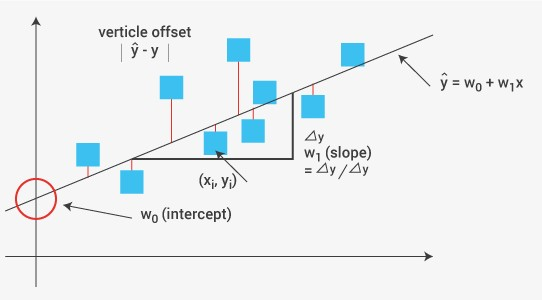

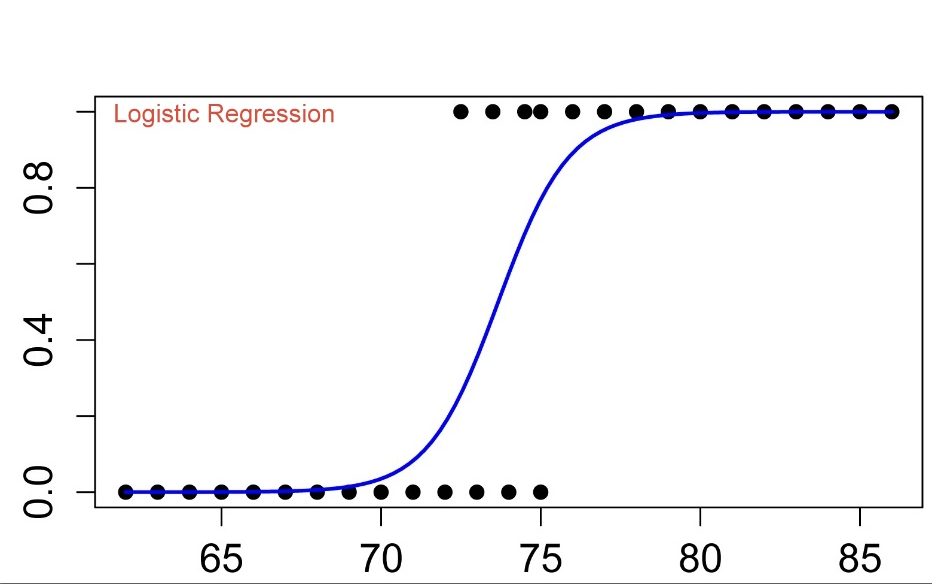

In [36]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report 

In [10]:
SEED = 17

In [3]:
data = pd.read_csv('insurance.csv')

In [45]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
le = LabelEncoder()

In [7]:
data.sex = le.fit_transform(data.sex)
data.smoker = le.fit_transform(data.smoker)
data.region  = le.fit_transform(data.region)

In [8]:
X_log, y_log = data.drop(columns='smoker'), data['smoker']

In [11]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size = .3, random_state = SEED)

In [12]:
log_reg = LogisticRegression(random_state=SEED)
log_reg.fit(X_log_train, y_log_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
log_reg.coef_

array([[-6.82367119e-02,  6.43499562e-01, -2.06224345e-01,
        -1.88425689e-02,  1.77435112e-01,  3.27969027e-04]])

In [46]:
data.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [19]:
print(classification_report(y_log_test, log_reg.predict(X_log_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       326
           1       0.92      0.78      0.84        76

    accuracy                           0.95       402
   macro avg       0.94      0.88      0.90       402
weighted avg       0.94      0.95      0.94       402



In [20]:
X_lin, y_lin = data.drop(columns='charges'), data['charges']

In [21]:
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size = .3, random_state = SEED)

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_lin_train, y_lin_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lin_reg.score(X_lin_train, y_lin_train)

0.7525521288423103

In [42]:
lin_reg.score(X_lin_test, y_lin_test)

0.7357269123910637

In [31]:
lin_reg.coef_

array([ 2.52487982e+02, -1.74050622e+01,  3.39362042e+02,  3.50658906e+02,
        2.44385839e+04, -3.41442985e+02])

In [32]:
rr = Ridge()
ls = Lasso()
elnet = ElasticNet()

In [43]:
scores = []
for _ in [rr, ls, elnet]:
    _.fit(X_lin_train, y_lin_train)
    scores.append(_.score(X_lin_train, y_lin_train))

for _ in scores:
    print('%.4f' % _)

0.7525
0.7526
0.3953


In [44]:
rr.score(X_lin_test, y_lin_test)

0.736520081630613

In [37]:
tree = DecisionTreeRegressor(random_state=SEED)
tree.fit(X_lin_train, y_lin_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=17, splitter='best')

In [40]:
tree.score(X_lin_train, y_lin_train)

0.9987462048490416

In [41]:
tree.score(X_lin_test, y_lin_test)

0.6612522556321709